In [1]:
import mogptk
model=mogptk.LoadModel("multioutput")

In [2]:
import matplotlib.pyplot as plt
import torch
import numpy as np
from scipy.fft import rfft, rfftfreq

In [29]:
def func1(t):
    return torch.tensor([np.sin(t)+ np.cos(t**2)+ max(30,t) ])

def func2(t):
    return (torch.relu(func1(t))+ torch.sigmoid(func1(t)))

In [30]:
num_training_samples=50
length=6

x_train=[]
for i in range(num_training_samples):
    index=i+i*6+12
    x_train.append(np.linspace(index, index+6, 6))

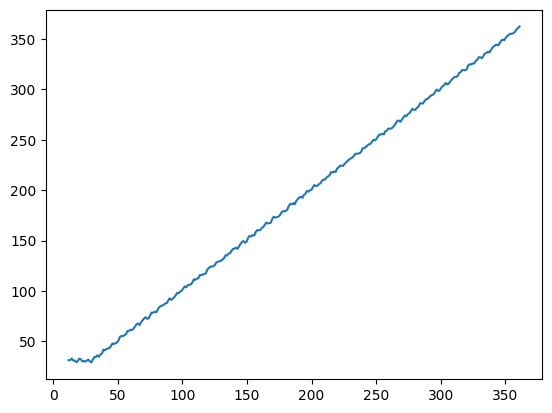

In [31]:
f1=[]
f2=[]
for i in x_train:
    values1=[]
    values2=[]
    for index in i:
        values1.append(func1(index).item())
        values2.append(func2(index).item())
    f1.append(values1)
    f2.append(values2)
    
flat_x=[   x for xs in f1 for x in xs  ]
flat_y=[ x for xs in f2 for x in xs  ]
x_points=np.asarray(x_train).flatten()
plt.plot(x_points, flat_y)

In [32]:
_,y_hat,_,_=model.predict(torch.tensor(x_train))

In [33]:
y_hat

[array([-6.00429716e-14, -1.04939684e-14,  3.79679904e-14,  8.45090695e-14,
         1.28438155e-13,  1.69189805e-13,  2.06298762e-13,  2.39369761e-13,
         2.68047225e-13,  2.91989724e-13,  3.10853530e-13,  3.24288252e-13,
         3.31945609e-13,  3.33500254e-13,  3.28679610e-13,  3.17298270e-13,
         2.99292024e-13,  2.74746836e-13,  2.43919201e-13,  2.07245757e-13,
         1.65341577e-13,  1.18987827e-13,  6.91103277e-14,  1.67508349e-14,
        -3.69671106e-14, -9.08761100e-14, -1.43804976e-13, -1.94619115e-13,
        -2.42258904e-13, -2.85773210e-13, -3.24344777e-13, -3.57304354e-13,
        -3.84131224e-13, -4.04439397e-13, -4.17950900e-13, -4.24459957e-13,
        -4.23793895e-13, -4.15777832e-13, -4.00210204e-13, -3.76854897e-13,
        -3.45453322e-13, -3.05756757e-13, -2.57576212e-13, -2.00844708e-13,
        -1.35685534e-13, -6.24799980e-14,  1.80708601e-14,  1.04894614e-13,
         1.96508539e-13,  2.90995475e-13]),
 array([-5.97491257e-14, -1.07579768e-14,  3

In [34]:
results=[]
for s1,s2,s3,s4,s5,s6 in zip(y_hat[0], y_hat[1], y_hat[2],y_hat[3], y_hat[4], y_hat[5]):
    results.append(s1)
    results.append(s2)
    results.append(s3)
    results.append(s4)
    results.append(s5)
    results.append(s6)

In [35]:
len(results)

300

In [36]:
len(x_points)

300

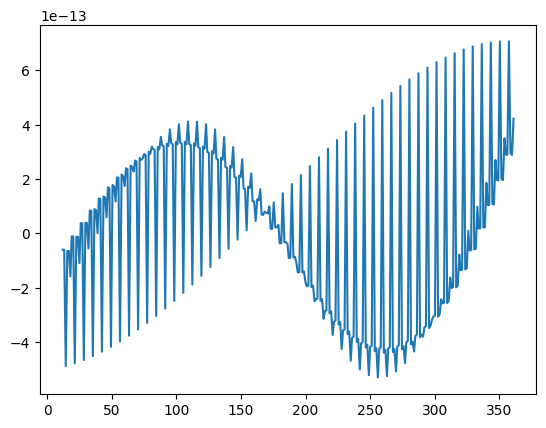

In [37]:
plt.plot(x_points, results)

In [22]:
model_in1=mogptk.LoadModel("f_independent_sm")
model_in2=mogptk.LoadModel("s_independent_sm")
model_in3=mogptk.LoadModel("t_independent_sm")
model_in4=mogptk.LoadModel("f1_independent_sm")
model_in5=mogptk.LoadModel("ff_independent_sm")
model_in6=mogptk.LoadModel("si_independent_sm")

In [23]:
_, f1,_,_=model_in1.predict(torch.tensor(x_train))
_, f2,_,_=model_in2.predict(torch.tensor(x_train))
_, f3,_,_=model_in3.predict(torch.tensor(x_train))
_, f4,_,_=model_in4.predict(torch.tensor(x_train))
_, f5,_,_=model_in5.predict(torch.tensor(x_train))
_, f6,_,_=model_in6.predict(torch.tensor(x_train))

In [24]:
len(f1)

50

In [25]:
result=[]
for i in range(len(f1)):
    result+=[f1[i],f2[i],f3[i],f4[i],f5[i],f6[i]]

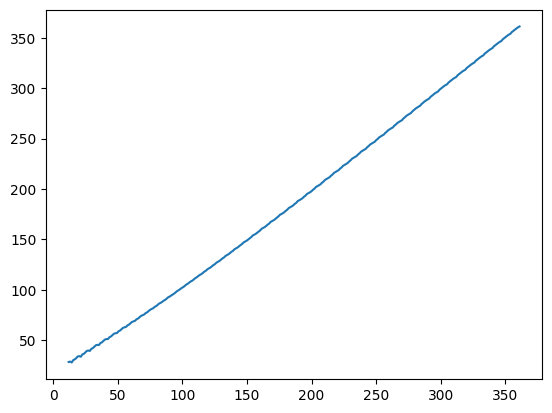

In [26]:
plt.plot(x_points,result)

In [38]:
model_in1=mogptk.LoadModel("f_independent_sm2")
model_in2=mogptk.LoadModel("s_independent_sm2")
model_in3=mogptk.LoadModel("t_independent_sm2")
model_in4=mogptk.LoadModel("f1_independent_sm2")
model_in5=mogptk.LoadModel("ff_independent_sm2")
model_in6=mogptk.LoadModel("si_independent_sm2")

In [39]:
_, f1,_,_=model_in1.predict(torch.tensor(x_train))
_, f2,_,_=model_in2.predict(torch.tensor(x_train))
_, f3,_,_=model_in3.predict(torch.tensor(x_train))
_, f4,_,_=model_in4.predict(torch.tensor(x_train))
_, f5,_,_=model_in5.predict(torch.tensor(x_train))
_, f6,_,_=model_in6.predict(torch.tensor(x_train))

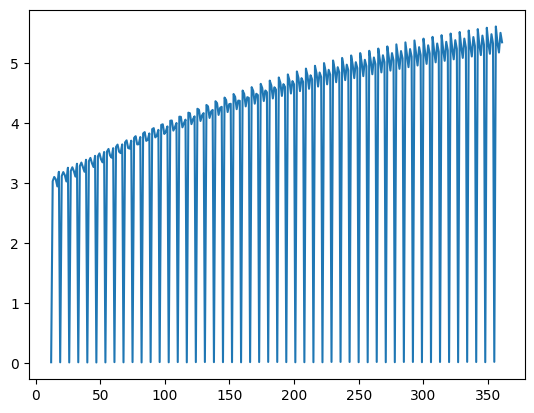

In [44]:
result=[]
for i in range(len(f1)):
    result+=[f1[i],f2[i],f3[i],f4[i],f5[i],f6[i]]
plt.plot(x_points,result)

In [8]:
def func1(t):
    return torch.tensor([np.sin(8*np.pi*t)])

def func3(t):
    return torch.tensor([np.sin(8*np.pi*t+np.pi/10)**2 + np.cos(4*np.pi*t)])


x_train=np.linspace(0,1,300)

points1=[func1(i) for i in x_train]
points2=[func3(i) for i in x_train]
i=0
f1=[]
f2=[]
points=[]
while i< len(points1):
    f2.append(points2[i:i+6])
    f1.append(points1[i:i+6])
    points.append(x_train[i:i+6])
    i+=6
x_points=np.asarray(x_train).flatten()
x_train=np.asarray(f1)
flat_y=np.asarray(points2).flatten()

C:\Users\anast\PycharmProjects\Spectral_Mixture\.venv\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
C:\Users\anast\PycharmProjects\Spectral_Mixture\.venv\lib\site-packages\ipykernel_launcher.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
C:\Users\anast\PycharmProjects\Spectral_Mixture\.venv\lib\site-packages\ipykernel_la

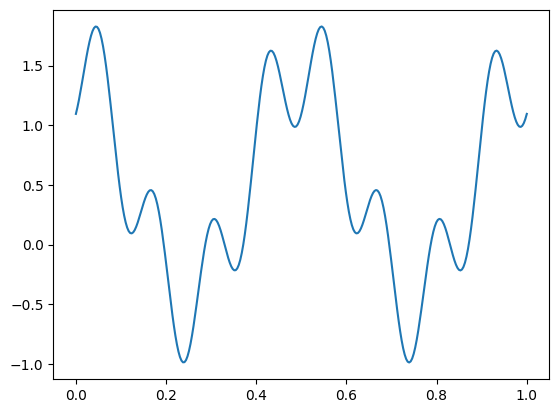

In [9]:
plt.plot(x_points, flat_y)


DEPRECATED: use model.parameters() instead of model.get_parameters()
DEPRECATED: use model.parameters() instead of model.get_parameters()
DEPRECATED: use model.parameters() instead of model.get_parameters()
(50, 6)
(300,)


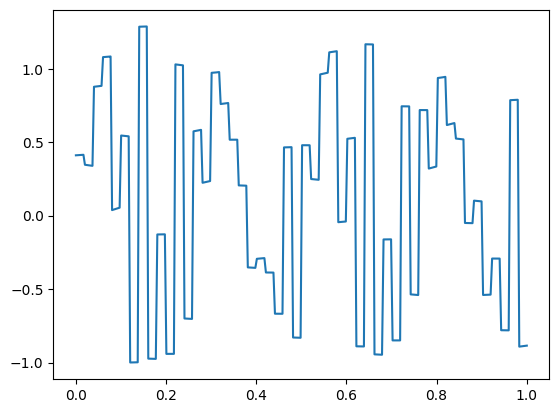

In [10]:


model_in1=mogptk.LoadModel("f_independent_sm3")
a=model_in1.get_parameters()
model_in2=mogptk.LoadModel("s_independent_sm3")
b=model_in2.get_parameters()
model_in3=mogptk.LoadModel("t_independent_sm3")
c=model_in3.get_parameters()
model_in4=mogptk.LoadModel("f1_independent_sm3")
model_in5=mogptk.LoadModel("ff_independent_sm3")
model_in6=mogptk.LoadModel("si_independent_sm3")
print((x_train).shape)
_,f1,_,_=model_in1.predict((x_train))
_,f2,_,_=model_in2.predict((x_train))
_,f3,_,_=model_in3.predict((x_train))
_,f4,_,_=model_in4.predict((x_train))
_,f5,_,_=model_in5.predict((x_train))
_,f6,_,_=model_in6.predict((x_train))

result=[]
for i in range(len(f1)):
    result+=[f1[i],f2[i],f3[i],f4[i],f5[i],f6[i]]

print(np.asarray(result).shape)

plt.plot(x_points,result)


In [41]:
for i in a:
    print(i)
for i in b: 
    print(i)
for i in c:
    print(i)

IndependentMultiOutputKernel[0].SpectralMixtureKernel.magnitude=[0.8577752450879723, 0.1906508144871929, 0.08886989752432548, 0.04818662939437969, 0.03809678920587216, 0.036828155130632326, 0.007423098151487136, 0.0066670259065913316, 0.006667154546968568, 0.006625893433251975, 0.0065360530799754854, 0.006432635801125969, 0.006273805058591692, 0.006170232302173961, 0.006092968437052856]
IndependentMultiOutputKernel[0].SpectralMixtureKernel.mean=[[1.6135057136303452, 1.6135057136303452, 1.6135057136303452, 1.613505713630276, 1.613505713630276, 1.613505713630276], [7.77513965948492, 7.77513965948492, 7.77513965948492, 7.775139659484917, 7.775139659484917, 7.775139659484917], [2.7036283425773786, 2.7036283425773786, 2.7036283425773786, 2.7036283425774523, 2.7036283425774523, 2.7036283425774523], [2.881488021506529, 2.881488021506529, 2.881488021506529, 2.8814880215066054, 2.8814880215066054, 2.8814880215066054], [7.781133426624849, 7.781133426624849, 7.781133426624849, 7.781133426624848, 